# Tutorial Brief

We will be using tweepy library to perform data mine on twitter.

##Twitter API

https://apps.twitter.com/

###Topics:

**Topic 1**: Register You App.

**Topic 2**: Using REST API

**Video Tutorial**:

https://www.youtube.com/user/roshanRush

# Import the library

In [1]:
import tweepy
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

# Authentication

In [2]:
consumer_key = "MYzZWA8BPDxrFxIk9g2XA" # Use your own key. To get a key https://apps.twitter.com/
consumer_secret = "mRIq4GdmPm5rGrUeqBbTvjvZS5qH88pLhylBIaiEU"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)

api = tweepy.API(auth)

# REST API

## Searching for Tweets

###`API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])`
```

    Returns tweets that match a specified query.
    Parameters:	

        q – the search query string
        lang – Restricts tweets to the given language, given by an ISO 639-1 code.
        locale – Specify the language of the query you are sending. This is intended for language-specific clients and the default should work in the majority of cases.
        rpp – The number of tweets to return per page, up to a max of 100.
        page – The page number (starting at 1) to return, up to a max of roughly 1500 results (based on rpp * page.
        geocode – Returns tweets by users located within a given radius of the given latitude/longitude. The location is preferentially taking from the Geotagging API, but will fall back to their Twitter profile. The parameter value is specified by “latitide,longitude,radius”, where radius units must be specified as either “mi” (miles) or “km” (kilometers). Note that you cannot use the near operator via the API to geocode arbitrary locations; however you can use this geocode parameter to search near geocodes directly.
        show_user – When true, prepends “<user>:” to the beginning of the tweet. This is useful for readers that do not display Atom’s author field. The default is false.

    Return type:	

    list of SearchResult objects
```

In [5]:
results = api.search(q="Austin")


### Inspecting Results

In [6]:
len(results)

15

In [7]:
def print_tweet(tweet):
    print "@%s - %s (%s)" % (tweet.user.screen_name, tweet.user.name, tweet.created_at)
    print tweet.text

tweet=results[1]
print_tweet(tweet)

@jobsyellow - Jobs Yellow Pages (2016-05-03 01:43:58)
TX JOB: Austin TX - Sales Engineer I CDK Data Services Inc. - Stability meets Agility. With... https://t.co/bdJP6Iyd6K #Austin,#TX,#jobs


### Inspecting a Status Object

In [8]:
tweet=results[0]

for param in dir(tweet):
    if not param.startswith("_"):
        print "%s : %s" % (param, eval("tweet." + param))

author : User(follow_request_sent=None, has_extended_profile=False, profile_use_background_image=True, _json={u'follow_request_sent': None, u'has_extended_profile': False, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 585697621, u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/721307680292282369/nesq2DPL_normal.jpg', u'profile_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}}, u'followers_count': 281, u'profile_sidebar_border_color': u'C0DEED', u'id_str': u'585697621', u'profile_background_color': u'C0DEED', u'listed_count': 0, u'is_translation_enabled': False, u'utc_offset': -18000, u'statuses_count': 4615, u'description': u'', u'friends_count': 231, u'location': u'', u'profile_link_color': u'0084B4', u'profile_image_url': u'http://pbs.twimg.com/profile_images/721

### Inspecting a User Object

In [9]:
user=tweet.author

for param in dir(user):
    if not param.startswith("_"):
        print "%s : %s" % (param, eval("user." + param))

contributors_enabled : False
created_at : 2012-05-20 14:07:41
default_profile : True
default_profile_image : False
description : 
entities : {u'description': {u'urls': []}}
favourites_count : 510
follow : <bound method User.follow of User(follow_request_sent=None, has_extended_profile=False, profile_use_background_image=True, _json={u'follow_request_sent': None, u'has_extended_profile': False, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 585697621, u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/721307680292282369/nesq2DPL_normal.jpg', u'profile_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}}, u'followers_count': 281, u'profile_sidebar_border_color': u'C0DEED', u'id_str': u'585697621', u'profile_background_color': u'C0DEED', u'listed_count': 0, u'is_translation

### Using Cursor for Pagination

For data mining you will be dealing with a large amount of results. Cursor is a simple way to handle interation and results pages.

In [14]:
results = []
for tweet in tweepy.Cursor(api.search, q="Austin").items(1500):
    results.append(tweet)

print len(results)

1500


### Store Results in a Data Frame

In [15]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data

    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set
data_set = process_results(results)

## Looking at the Data

In [17]:
data_set.user_location

0            Pittsburgh ➡ Annapolis⚓⛵
1                                 202
2                                    
3                          Austin, TX
4                                    
5                                    
6                       Austin, Texas
7            ÜT: -6.261838,106.782233
8                                    
9                                    
10                       Indianapolis
11                      San Francisco
12                       Emo, Ontario
13                         Dallas, TX
14                  pacific northwest
15                          FW, Texas
16                         Austin, TX
17                                   
18                      Central Texas
19                      Central Texas
20                      Central Texas
21                                   
22                        Chattanooga
23                                   
24                                USA
                    ...              
1475        

In [19]:
data_set.tail(5)

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
95,726864166582145024,Top 10 IPython Notebook #Tutorials for #DataSc...,2016-05-01 20:01:36,30,44,Hootsuite,20167623,kdnuggets,Gregory Piatetsky,2009-02-05 17:37:26,"KDnuggets President, #Analytics, #BigData, #Da...",55697,407,"Brookline, MA, USA"
96,726848919620210688,How to calculate inner matrix product in Ipyth...,2016-05-01 19:01:01,0,0,Buffer,2311645130,AnalyticsVidhya,Analytics Vidhya,2014-01-26 10:48:31,Join the largest analystics community https://...,4779,264,
97,726845654752854016,@clauersen Indeed... prob will for my current ...,2016-05-01 18:48:02,0,1,TweetDeck,845999910,zhao_shirley,Shirley Zhao,2012-09-25 18:26:20,#medlibs #datalibs #scilibs #academic #librari...,281,394,"Salt Lake City, UT"
98,726820163035656193,RT @AnalyticsVidhya: How to transpose the high...,2016-05-01 17:06:45,1,0,Hootsuite,17982188,hendrosubagyo,hendro subagyo,2008-12-09 03:07:46,ora mandeg ngelmu,282,192,Jakarta
99,726818666415853568,How to transpose the higher dimension matrix i...,2016-05-01 17:00:48,1,2,Buffer,2311645130,AnalyticsVidhya,Analytics Vidhya,2014-01-26 10:48:31,Join the largest analystics community https://...,4779,264,


# Visualizing Results

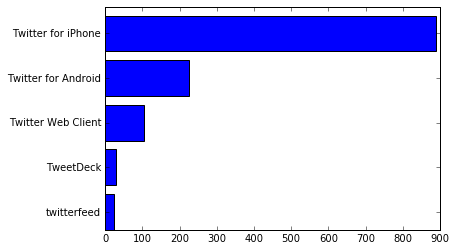

In [18]:
sources = data_set["source"].value_counts()[:5][::-1]

plt.barh(xrange(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()